In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
from astroquery.mast import Observations
import lightkurve

Following LightKurve tutorial example to make sure things are working :

First, we start Python and use the search_targetpixelfile function to obtain the Kepler pixel data for the star from the data archive:

( http://docs.lightkurve.org/tutorials/)

Lets try this for GJ1243

In [2]:
from lightkurve import search_targetpixelfile
gj1243 = search_targetpixelfile(9726699).download_all()

In [3]:
gj1243

TargetPixelFileCollection of 15 objects:
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 

In [4]:
#Looking just at quarter 1 in the Kepler data of GJ1243
gj1243_q1 = search_targetpixelfile(9726699,quarter=1).download()

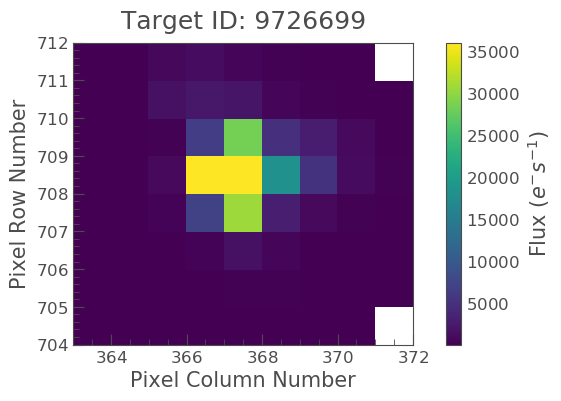

In [5]:
gj1243_q1.plot(frame=1)

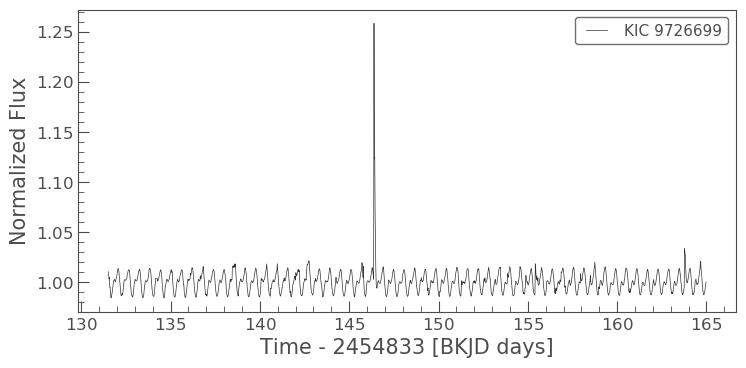

In [6]:
gj1243_q1_lc = gj1243_q1.to_lightcurve(aperture_mask='all');
gj1243_q1_lc.plot()

In [7]:
#when figuring where the flares are use a timestamp range (don't use ==)
#use short cadence data implement flag
#make the full light curve (stack the quarters)
#get rid of quarter to quarter variations

Following the tutorial for how to make a full light curve with all of the quarters of data

Now lets try this for GJ1243

In [8]:
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
gj1243_q1 = search_targetpixelfile(9726699,quarter=1).download()
target = '9726699'

In [9]:
print(target)
print(gj1243_q1)

9726699
KeplerTargetPixelFile Object (ID: 9726699)


In [10]:
lcf = search_lightcurvefile(9726699, quarter=2).download().PDCSAP_FLUX
print(lcf)

KeplerLightCurve(ID: 9726699)


In [11]:
gj1243_collection = search_lightcurvefile(target,cadence='short').download_all()
print (gj1243_collection)

LightCurveFileCollection of 11 objects:
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 



In [12]:
gj1243_collection[0].PDCSAP_FLUX

KeplerLightCurve(ID: 9726699)

In [13]:
gj1243lc = gj1243_collection[0].PDCSAP_FLUX

for q in range(1,len(gj1243_collection)):
    try:
        gj1243lc = gj1243lc.append(gj1243_collection[q].PDCSAP_FLUX)
    except:
            print(q)

In [14]:
print(len(gj1243_collection))

11


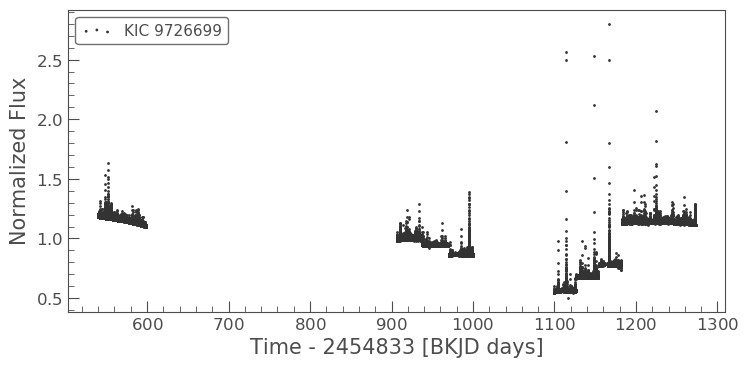

In [15]:
gj1243lc.scatter();

In [2]:
gj1243lc.flatten()

NameError: name 'gj1243lc' is not defined

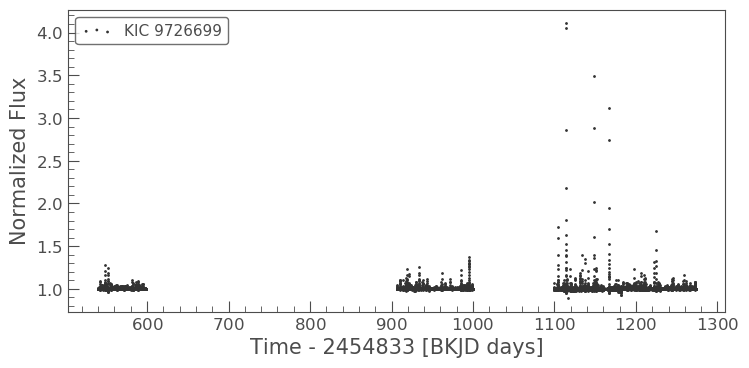

In [17]:
gj1243lc.flatten(window_length=11).scatter()

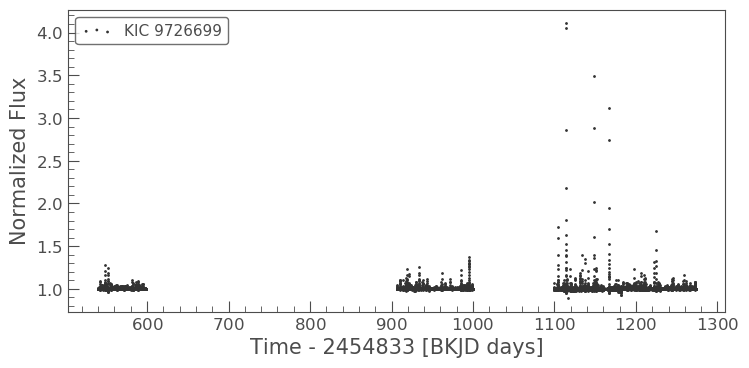

In [18]:
gj1243lc.flatten(window_length=11,polyorder=2).scatter()

Cotrending Basis Vectors are used to remove long term trends in light curves. Below we take a look at the long term trends in GJ1243

In [19]:
from lightkurve.correctors import KeplerCBVCorrector
trends = search_lightcurvefile(9726699, quarter=2).download()
lc = trends.SAP_FLUX
lcp= trends.PDCSAP_FLUX

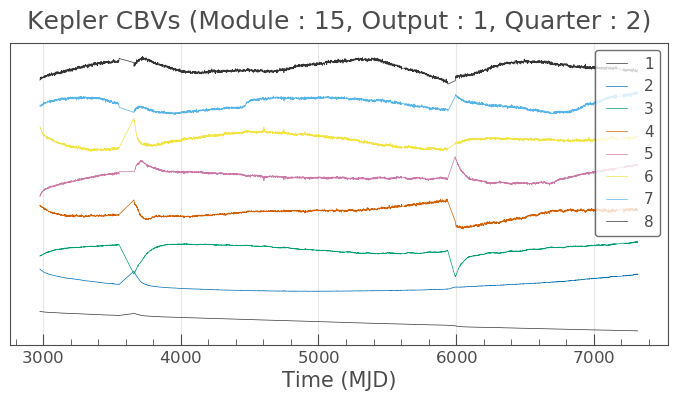

In [20]:
KeplerCBVCorrector(trends).plot_cbvs([1,2,3,4,5,6,7,8]);

In [21]:
corr_lc =  KeplerCBVCorrector(trends).correct(cbvs=[1,2,3,4])

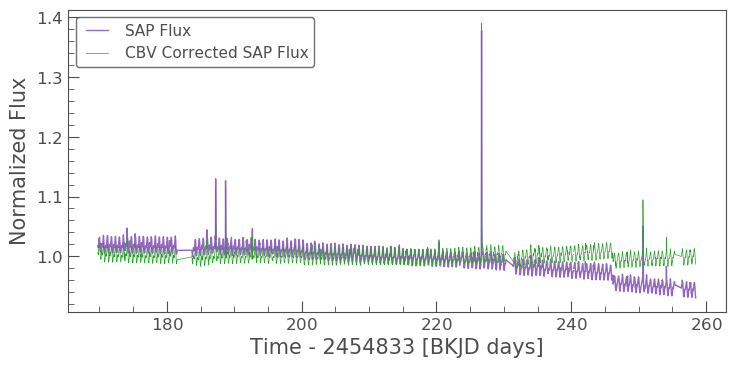

In [22]:
ax = lc.plot(color='C4', label='SAP Flux', linestyle='-',linewidth='1')
#lcp.plot(ax=ax,color='C1', label='PDCSAP Flux', linestyle='-',linewidth='1')
corr_lc.plot(ax=ax, color='C2', label='CBV Corrected SAP Flux', linestyle='-');

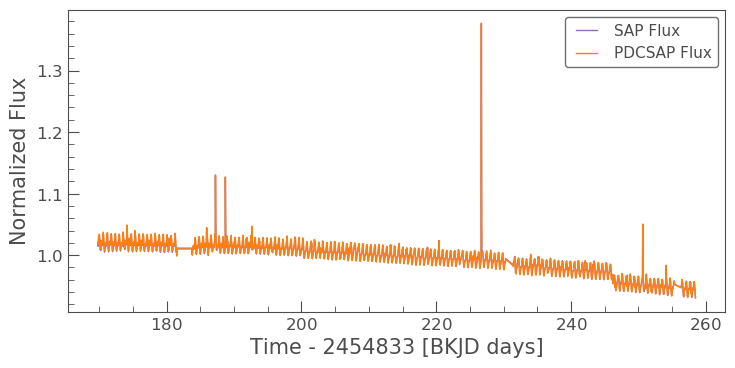

In [23]:
ax = lc.plot(color='C4', label='SAP Flux', linestyle='-',linewidth='1')
lcp.plot(ax=ax,color='C1', label='PDCSAP Flux', linestyle='-',linewidth='1')
#corr_lc.plot(ax=ax, color='C2', label='CBV Corrected SAP Flux', linestyle='-');

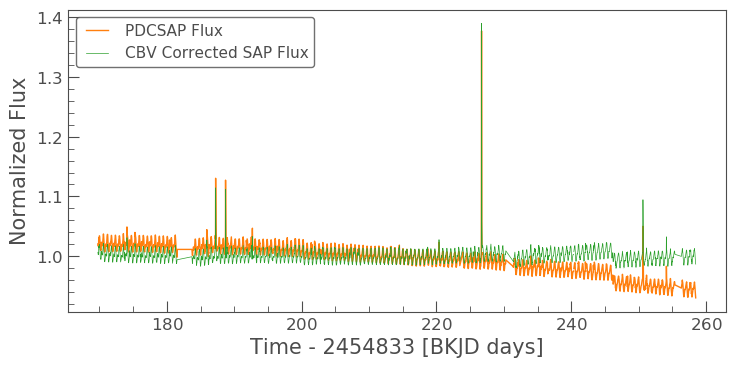

In [24]:
#ax = lc.plot(color='C4', label='SAP Flux', linestyle='-',linewidth='1')
ax2=lcp.plot(color='C1', label='PDCSAP Flux', linestyle='-',linewidth='1')
corr_lc.plot(ax=ax2, color='C2', label='CBV Corrected SAP Flux', linestyle='-');

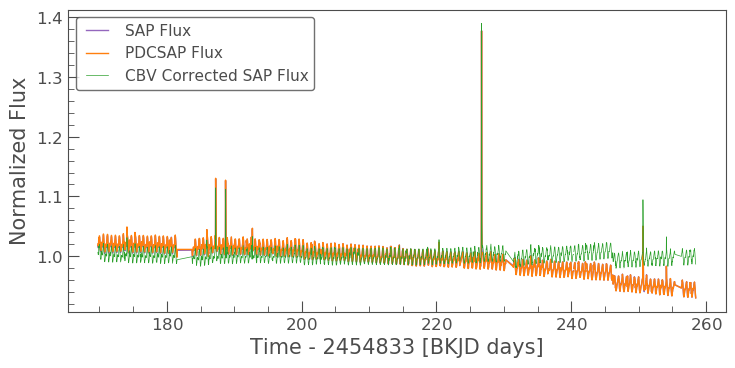

In [25]:
ax = lc.plot(color='C4', label='SAP Flux', linestyle='-',linewidth='1')
lcp.plot(ax=ax,color='C1', label='PDCSAP Flux', linestyle='-',linewidth='1')
corr_lc.plot(ax=ax, color='C2', label='CBV Corrected SAP Flux', linestyle='-');